# Primera Iteración:

## 1. Introducción
<p>Se nos hizo entrega como grupo un archivo excel con los registros de un grupo de clientes del banco llamado Monopoly, el cual contiene variada información y datos de los clientes de este. Este banco recientemente fue adquirido por un banco extranjero llamado "Dormammu", es por esta razon que se nos ha encargado como equipo en esta primera iteración realizar un analisis exploratorio a partir estos datos.</p>

## 2. Preparando el entorno de desarrollo

En primer lugar importamos, todas las librerias necesarias para poder llevar a cabo las siguientes tareas.

In [2]:
#Apartado de importes

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.express as px
import statistics #Import para la estadistica de la curtosis.
from scipy import stats

In [ ]:
read_file = pd.read_excel (r'C:\Users\dsola\Documents\Notebooks Jupyter\Semestral\BaseMonopoly.xlsx')
read_file.to_csv (r'C:\Users\dsola\Documents\Notebooks Jupyter\Semestral\Base.csv', index = None, header=True)

En primer lugar mediante la libreria pandas se transformo el excel a csv para poder leerlo y trabajar con mas facilidad.

In [3]:
df = pd.read_csv('Base.csv')

In [4]:
df.head(15)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.00,33000,0.0,1099866.0,0.00,1099866.0,15080,0.00,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.00,300000,0.0,214592.0,0.00,214592.0,83596,0.00,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.00,216676,0.0,0.0,0.00,7400.0,0,0.00,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.00,60000,0.0,272762.0,0.00,272762.0,10591,0.00,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.00,272925,0.0,249562.0,0.00,75339.0,377782,0.00,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.00,35800,0.0,35800.0,0.00,0.0,51197,0.00,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.00,9391,0.0,8818.0,0.00,8818.0,0,0.00,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.00,6000,0.0,283520.0,0.00,283520.0,0,0.00,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.00,60000,0.0,507629.0,0.00,507629.0,0,0.00,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.00,92583,0.0,65487.0,0.00,65487.0,12084,0.00,R,0


Se revisa las columnas que contiene nuestro DataFrame.

In [ ]:
df.shape

(51124, 574)

Con esto revisamos el tamaño que posee nuestro DataFrame, el cual nos entrega que posee 4831 filas y 574 columnas.

## 3. Selección de variables a utilizar

Como grupo, definimos las siguientes variables a trabajar  

In [ ]:
df1= df.loc[:,'Id':'CUPO_MX']

In [ ]:
df1

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX
0,1,160,M,13.0,43,NaN,130,1,1,0,...,1,0,0,1,NaN,1,3,798000,1012000.0,1210.0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,1,0,1,0,NaN,1,1,750000,150000.0,1000.0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,1,0,1,1,1.0,1,2,1350000,200000.0,1500.0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0,0,0,0,1.0,1,2,1570800,220001.0,0.0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,1,0,1,0,1.0,2,3,2762000,2.0,6430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,...,1,0,0,1,1.0,2,3,999000,1000.0,550.0
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,...,1,0,0,1,1.0,1,1,1744200,1.0,300.0
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,...,1,0,0,1,1.0,1,2,1061000,194700.0,1526.0
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,1,0,0,0,NaN,1,1,1612000,300000.0,2300.0


Visualizamos la existencia de nulos dentro de cada columna, lo cual nos entrega que existen nulos en columnas como "Renta", "Region" y "CambioPin".

In [ ]:
df1.isna().sum()

Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
Renta           13365
Antiguedad          0
Internauta          0
Adicional           0
Dualidad            0
Monoproducto        0
Ctacte              0
Consumo             0
Hipotecario         0
Debito              0
CambioPin       19388
Cuentas             0
TC                  0
CUPO_L1             0
CUPO_L2             0
CUPO_MX             0
dtype: int64

A partir del contexto del caso, se infirio que los resultados nulos de la variable "CambioPin", significaban que el cliente no realizo un cambio de pin. Estos nulos los podiamos haber cambiado por un "0", sin embargo se decidió realizar un drop a esta, ya que es una variable que no usaremos en esta parte del estudio.

In [ ]:
DFinal = df1.drop(['CambioPin'], axis=1)

Seguido de eso, reemplazamos los datos nulos de 'Renta' y 'Region' por valores '0'.
<br>
En el caso de Renta los definimos como 0, ya que los clientes al dejar nulo se da a entender que no poseen renta.
<br>
En el caso de Region los definimos como 0, ya que las regiones vienen expresadas en numero y los nulos se da a entender que en su momento no registraron region de residencia.


In [ ]:
DFinal['Renta'] = DFinal['Renta'].fillna(value=0)

In [ ]:
DFinal['Region'] = DFinal['Region'].fillna(value=0)

Es por esto que el dataframe **"DFinal"** será el dataframe con el que trabajaremos esta primera entrega. Dentro de este, las variables con las que que llevaremos a cabo el estudio son las siguientes: <br/>
* Id = Identificador de cada cliente.<br/>
*  Subsegmento = Identificador de grupo de clientes correspondiente. <br/>
*  Sexo = Género registrado del cliente.  <br/>
*  Region = Región de residencia registrada por el cliente.<br/>
*  Edad = Edad registrada del cliente.<br/>
*  Renta = Renta que posee el cliente.<br/>
*  Antiguedad = Antiguedad en el banco del cliente en meses.<br/>
*  Internauta = Indicador de cliente que usa la web del banco. <br/>
*  Adicional = Indicador de tenencia de tarjetas de credito adicionales.<br/>
*  Dualidad = Indicador de dualidad con respecto a la posesion de 2 o más TC
<br/>
*  MonoProducto = Indicador de si el cliente posee solo 1 TC.<br/>
*  Ctate = Indicador de posesión de cuenta corriente.<br/>
*  Consumo = Indicador de Credito de Consumo.<br/>
*  Hipotecario = Indicador de Credito Hipotecario.<br/>
*  Debito = Indicador de Tenencia de TD.<br/>
*  Cuentas = Número de cuentas que posee el cliente.<br/>
*  TC = Numero de Tarjetas de creditos que posee el cliente<br/>
*  CUPO_L1 = Cupo que posee la TC para compras nacionales <br/>
*  CUPO_L2 = Cupo que posee la TC para avances en cuotas<br/>
*  CUPO_MX = Cupo que posee la TC para compras internacionales<br/>




In [ ]:
 DFinal

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX
0,1,160,1,13,43,0,130,1,1,0,0,1,0,0,1,1,3,798000,1012000.0,1210.0
1,2,160,0,13,46,143640,69,1,0,0,0,1,0,1,0,1,1,750000,150000.0,1000.0
2,3,170,0,13,45,929106,24,1,1,0,0,1,0,1,1,1,2,1350000,200000.0,1500.0
3,4,151,0,13,46,172447,134,0,1,0,1,0,0,0,0,1,2,1570800,220001.0,0.0
4,5,170,0,13,46,805250,116,0,1,1,0,1,0,1,0,2,3,2762000,2.0,6430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,0,13,51,364978,57,1,1,1,0,1,0,0,1,2,3,999000,1000.0,550.0
51120,51121,170,0,13,51,625376,39,1,0,0,0,1,0,0,1,1,1,1744200,1.0,300.0
51121,51122,160,0,13,47,806220,153,1,1,0,0,1,0,0,1,1,2,1061000,194700.0,1526.0
51122,51123,160,1,13,47,0,11,1,0,0,0,1,0,0,0,1,1,1612000,300000.0,2300.0


Revisamos los tipos de datos que contiene nuestro DataFrame, donde podemos apreciar que columnas como "Region" y "Renta" poseen valores float64, lo cual como grupo definimos como erroneo, ya que no nos parecian adecuados a la hora de realizar los distintos graficos a continuación.

In [ ]:
DFinal.dtypes

Id                int64
Subsegmento       int64
Sexo             object
Region          float64
Edad              int64
Renta           float64
Antiguedad        int64
Internauta        int64
Adicional         int64
Dualidad          int64
Monoproducto      int64
Ctacte            int64
Consumo           int64
Hipotecario       int64
Debito            int64
Cuentas           int64
TC                int64
CUPO_L1           int64
CUPO_L2         float64
CUPO_MX         float64
dtype: object

Es por esto que cambiamos el tipo de dato de ambas variables: 'Renta' y 'Region' de float64 a tipo int64.


In [ ]:
DFinal['Renta'] = DFinal['Renta'].astype('int64')

In [ ]:
DFinal['Region'] = DFinal['Region'].astype('int64')

Realizamos otra consulta de existencia de datos nulos y de los tipos de los datos para confirmar los cambios realizados.

In [ ]:
DFinal.isna().sum()

Id              0
Subsegmento     0
Sexo            1
Region          0
Edad            0
Renta           0
Antiguedad      0
Internauta      0
Adicional       0
Dualidad        0
Monoproducto    0
Ctacte          0
Consumo         0
Hipotecario     0
Debito          0
Cuentas         0
TC              0
CUPO_L1         0
CUPO_L2         0
CUPO_MX         0
dtype: int64

Tal como lo esperado nos entrega 0 nulos, por lo que podemos continuar.

In [ ]:
DFinal.dtypes

Id                int64
Subsegmento       int64
Sexo             object
Region            int64
Edad              int64
Renta             int64
Antiguedad        int64
Internauta        int64
Adicional         int64
Dualidad          int64
Monoproducto      int64
Ctacte            int64
Consumo           int64
Hipotecario       int64
Debito            int64
Cuentas           int64
TC                int64
CUPO_L1           int64
CUPO_L2         float64
CUPO_MX         float64
dtype: object

Y como podemos ver efectivamente se efectuaron los cambios de los tipos.



---



In [ ]:
DFinal.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX
0,1,160,M,13,43,0,130,1,1,0,0,1,0,0,1,1,3,798000,1012000.0,1210.0
1,2,160,H,13,46,143640,69,1,0,0,0,1,0,1,0,1,1,750000,150000.0,1000.0
2,3,170,H,13,45,929106,24,1,1,0,0,1,0,1,1,1,2,1350000,200000.0,1500.0
3,4,151,H,13,46,172447,134,0,1,0,1,0,0,0,0,1,2,1570800,220001.0,0.0
4,5,170,H,13,46,805250,116,0,1,1,0,1,0,1,0,2,3,2762000,2.0,6430.0


Como se aprecia en el dataframe, los valores de "Sexo" están representados por H y M en el caso de Hombres y Mujeres, esto como grupo nos hizo ver que posiblemente adelante en el uso de esta columna para estudio nos iba a traer problemas, es por esto que decidimos reemplazarlas por M y H por 0 y 1 respectivamente mediante la propiedad 'unique'.

In [ ]:
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Sexo'.
DFinal['Sexo']= label_encoder.fit_transform(df['Sexo'])
  
DFinal['Sexo'].unique()

array([1, 0, 2])

0 = Hombre
,
1 = Mujer
,
2 = Otro

In [ ]:
DFinal

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX
0,1,160,1,13,43,0,130,1,1,0,0,1,0,0,1,1,3,798000,1012000.0,1210.0
1,2,160,0,13,46,143640,69,1,0,0,0,1,0,1,0,1,1,750000,150000.0,1000.0
2,3,170,0,13,45,929106,24,1,1,0,0,1,0,1,1,1,2,1350000,200000.0,1500.0
3,4,151,0,13,46,172447,134,0,1,0,1,0,0,0,0,1,2,1570800,220001.0,0.0
4,5,170,0,13,46,805250,116,0,1,1,0,1,0,1,0,2,3,2762000,2.0,6430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,0,13,51,364978,57,1,1,1,0,1,0,0,1,2,3,999000,1000.0,550.0
51120,51121,170,0,13,51,625376,39,1,0,0,0,1,0,0,1,1,1,1744200,1.0,300.0
51121,51122,160,0,13,47,806220,153,1,1,0,0,1,0,0,1,1,2,1061000,194700.0,1526.0
51122,51123,160,1,13,47,0,11,1,0,0,0,1,0,0,0,1,1,1612000,300000.0,2300.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40078553d0>,
      dtype=object)

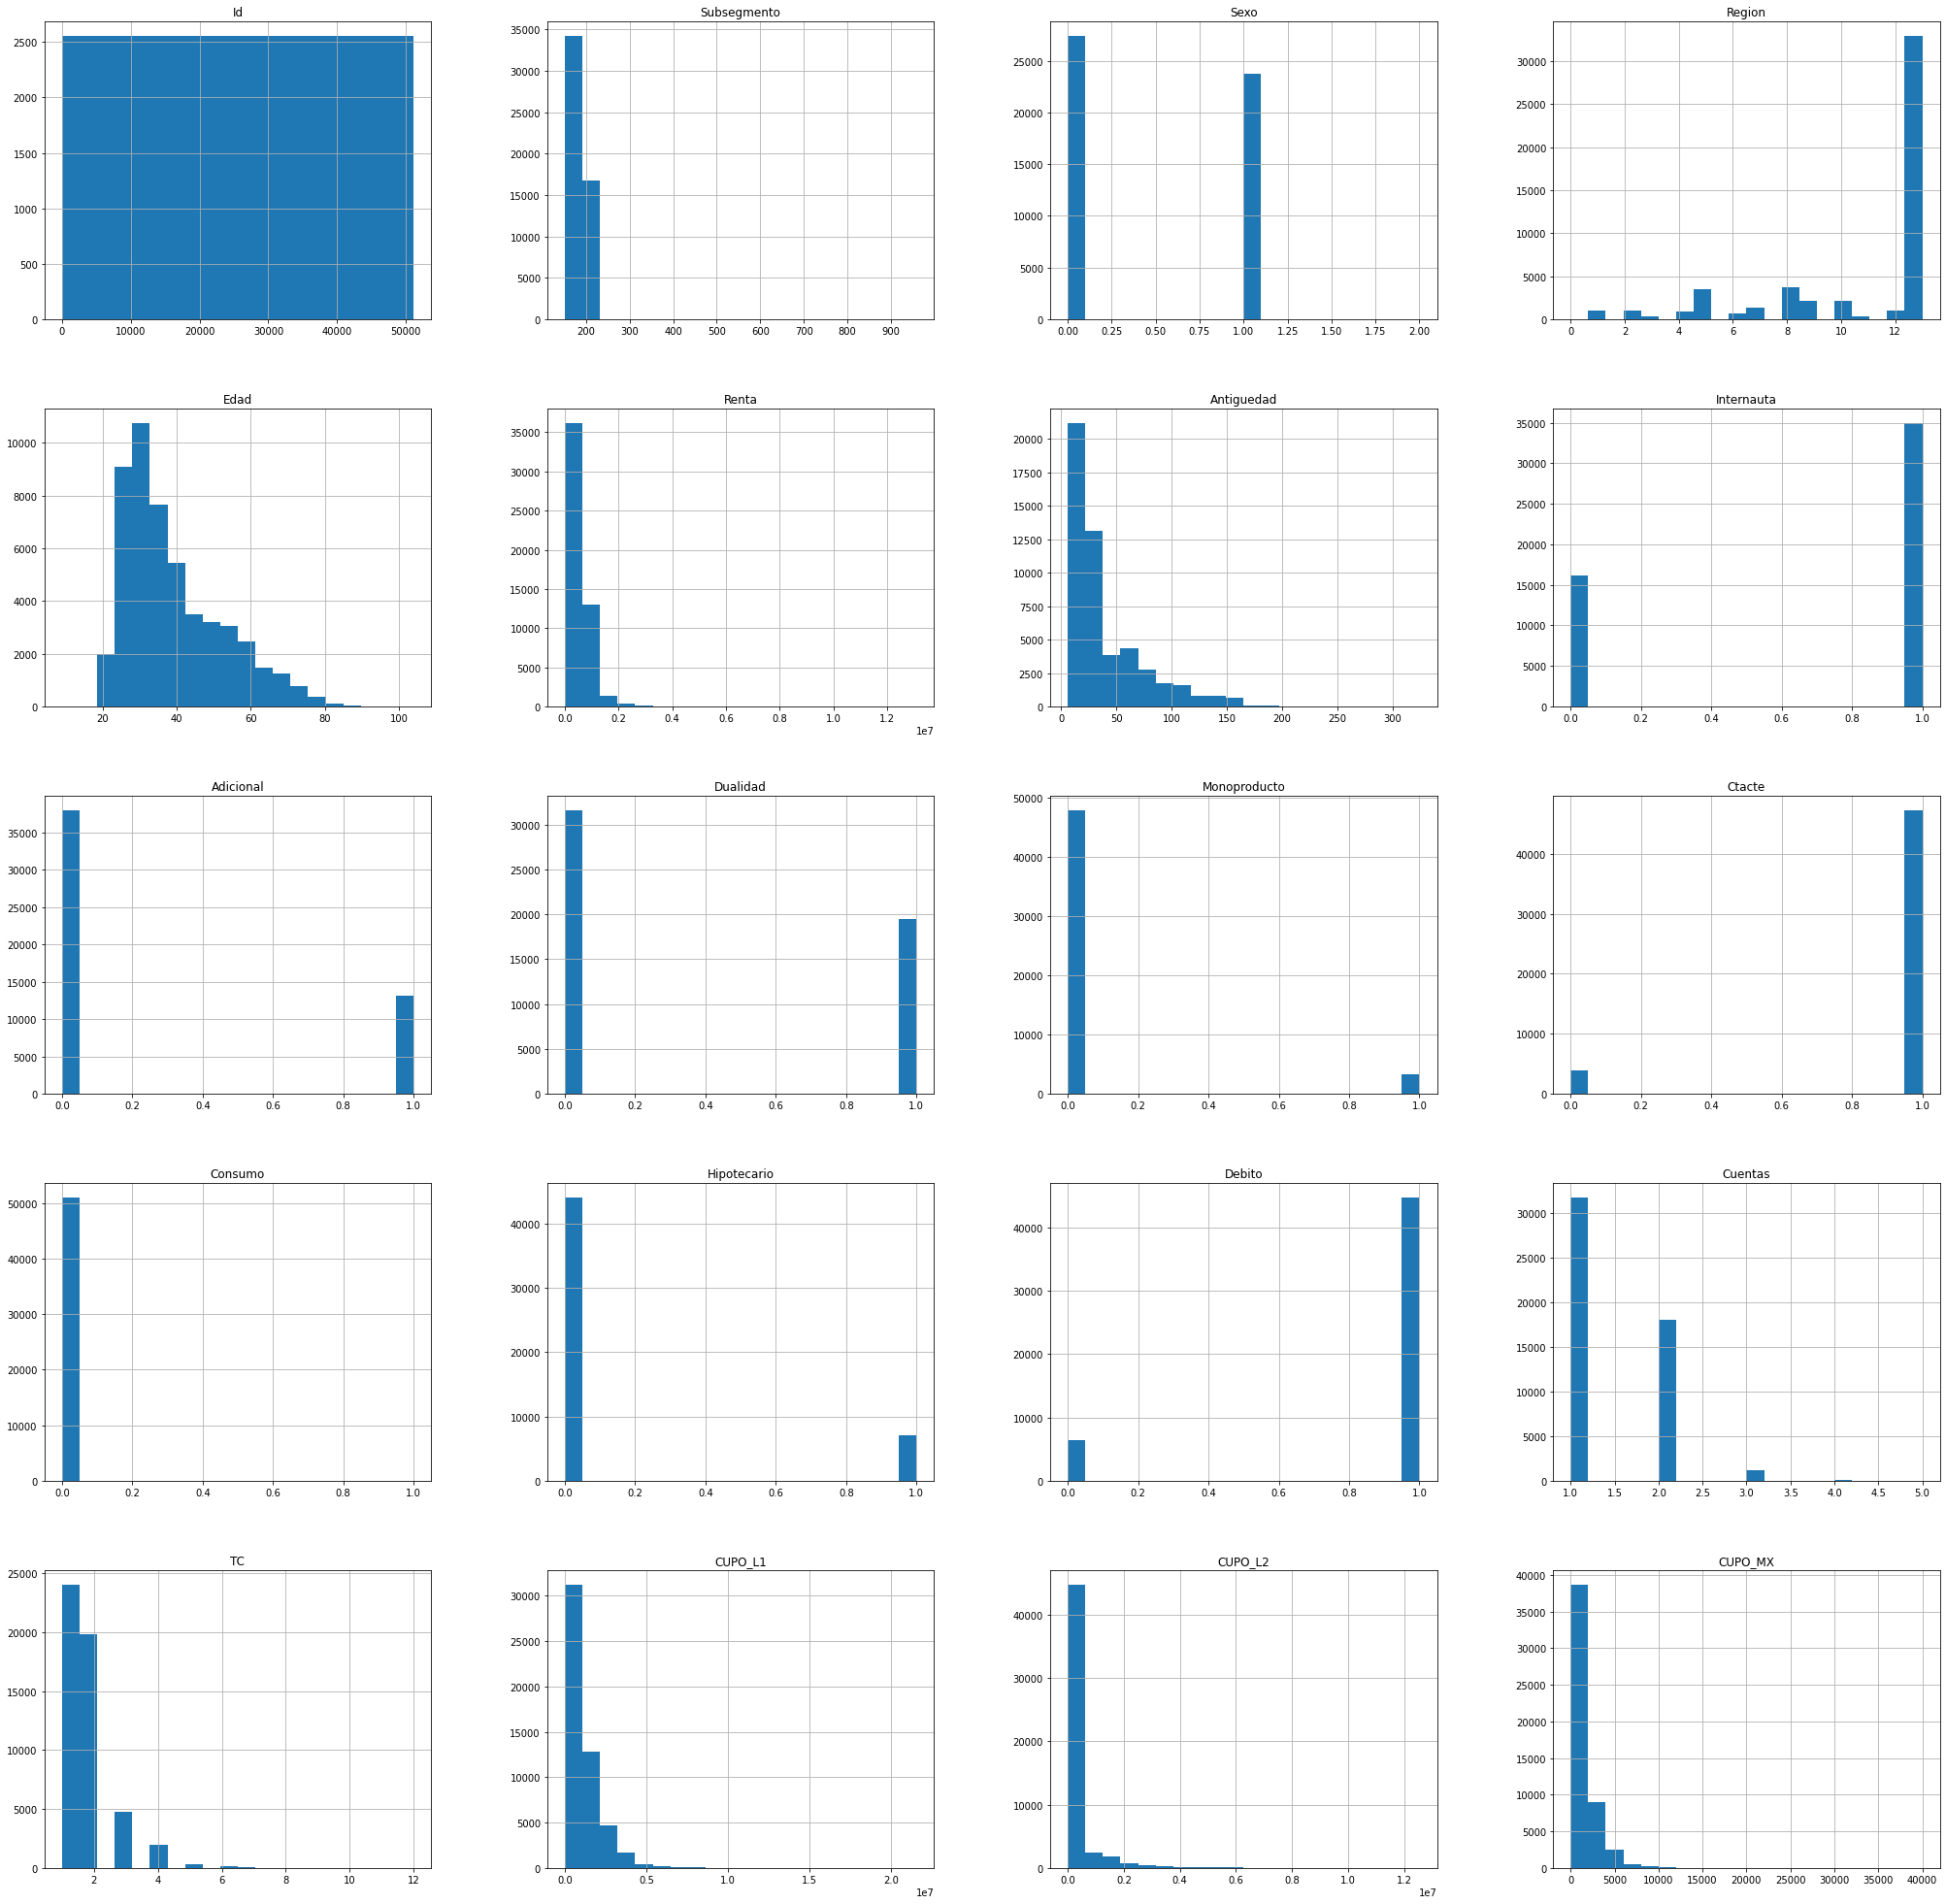

In [ ]:
DFinal.hist(figsize=(35,35),bins=20)

Dentro de los histogramas que tenemos podemos identificar que la mayoria de ellos tienen los datos a la izquierda, osea son histogramas sesgados a la izquierda, como 'Edad','Antiguedad', y los de cupo.
Tambien tenemos casos que podrian ser de datos atipcos como 'Dualidad' o 'Hipotecario'

La curtosis más clara de estos histogramas seria el de 'Edad', donde se puede identificar una curtosis Leptocúrtica por su pronunciada curva cercana a la mayor cantidad de datos.

##Simetria y Curtosis de los Histogramas

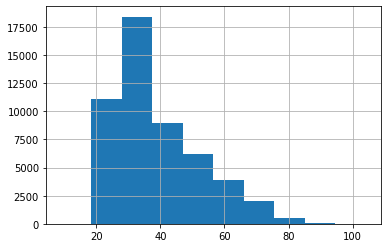

In [ ]:
DFinal.Edad.hist()

In [ ]:
X = DFinal.Edad
c = X.kurt()
print('Valor de la curtosis {:2.0f}'.format(c))
if c>0:
  print('Leptocurtica')
if c==0:
  print('Mesocurtica')
if c<0:
  print('Platicurtica')

Valor de la curtosis  0
Leptocurtica


In [ ]:
x = DFinal.Edad.mean()
m = statistics.median(X)
s = DFinal.Edad.std()

CP = 3*((x-m)/s)
print('Coeficiente de Pearson {}'.format(CP))
if CP==0:
  print('Simetria Central')
if CP<0:
  print('Simetria a la Izquierda (cola)')
else:
  print('Simetria a la Derecha (cola)')

Coeficiente de Pearson 0.8350743751252295
Simetria a la Derecha (cola)


In [ ]:
print(m)

35.0


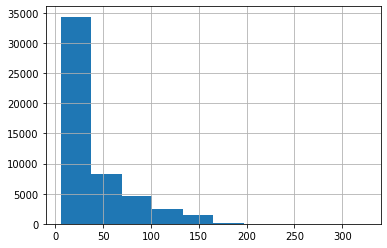

In [ ]:
DFinal.Antiguedad.hist()

In [ ]:
X = DFinal.Antiguedad
c = X.kurt()
print('Valor de la curtosis {:2.0f}'.format(c))
if c>0:
  print('Leptocurtica')
if c==0:
  print('Mesocurtica')
if c<0:
  print('Platicurtica')

Valor de la curtosis  4
Leptocurtica


In [ ]:
x = DFinal.Antiguedad.mean()
m = statistics.median(X)
s = DFinal.Antiguedad.std()

CP = 3*((x-m)/s)
print('Coeficiente de Pearson {}'.format(CP))
if CP==0:
  print('Simetria Central')
if CP<0:
  print('Simetria a la Izquierda (cola)')
else:
  print('Simetria a la Derecha (cola)')

Coeficiente de Pearson 1.1686426818210978
Simetria a la Derecha (cola)


In [ ]:
print(m)

25.0


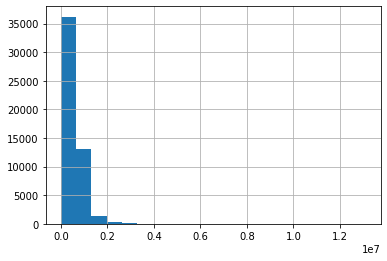

In [ ]:
DFinal.Renta.hist(bins=20)

In [ ]:
X = DFinal.Renta
c = X.kurt()
print('Valor de la curtosis {:2.0f}'.format(c))
if c>0:
  print('Leptocurtica')
if c==0:
  print('Mesocurtica')
if c<0:
  print('Platicurtica')

Valor de la curtosis 35
Leptocurtica


In [ ]:
x = DFinal.Renta.mean()
m = statistics.median(X)
s = df1.Renta.std()

CP = 3*((x-m)/s)
print('Coeficiente de Pearson {}'.format(CP))
if CP==0:
  print('Simetria Central')
if CP<0:
  print('Simetria a la Izquierda (cola)')
else:
  print('Simetria a la Derecha (cola)')

Coeficiente de Pearson 0.232431718134491
Simetria a la Derecha (cola)


In [ ]:
print(m)

458023.5


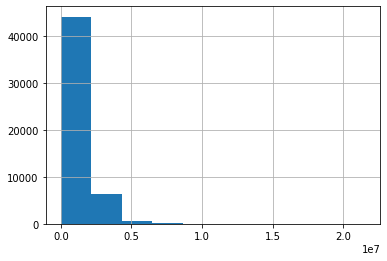

In [ ]:
DFinal.CUPO_L1.hist()

In [ ]:
X = DFinal.CUPO_L1
c = X.kurt()
print('Valor de la curtosis {:2.0f}'.format(c))
if c>0:
  print('Leptocurtica')
if c==0:
  print('Mesocurtica')
if c<0:
  print('Platicurtica')

Valor de la curtosis 16
Leptocurtica


In [ ]:
x = DFinal.CUPO_L1.mean()
m = statistics.median(X)
s = DFinal.CUPO_L1.std()

CP = 3*((x-m)/s)
print('Coeficiente de Pearson {}'.format(CP))
if CP==0:
  print('Simetria Central')
if CP<0:
  print('Simetria a la Izquierda (cola)')
else:
  print('Simetria a la Derecha (cola)')

Coeficiente de Pearson 0.9281643887237712
Simetria a la Derecha (cola)


In [ ]:
print(m)

800000.0


Para la curtosis se uso la formula "coeficiente de curtosis" la cual mide el grado de apuntamiento o achatamiento de la distribucion de la frecuencia, respecto a la curva de distribucion normal que tiene coeficiente igual a 0.

*   Si la curtosis da un valor mayor a 0 es Leptocurtica.
*   Si entrega un valor igual a 0 es Mesocurtica.
*   Y si es un valor menor a 0 es Platicurtica.

Para la simetria de la curva se uso la formula de "Coeficiente de Pearson"

*   Si el coeficiente es mayor a 0 la simetria es a la derecha.
*   Si el coeficiente es igual a 0 la simetria es central.
*   Si el coeficiente es menor a 0 la simetria es a la izquierda.

## 4.Trabajando con variable "Region"

En esta sección del estudio, tomaremos la variable "Region" para ver la distribucion de los clientes, segun la region de residencia que tienen registrada.

In [ ]:
Regiones_va = pd.get_dummies(DFinal['Region'])

Tarapaca = Regiones_va[1].sum()
Antofagasta = Regiones_va[2].sum()
Atacama = Regiones_va[3].sum()
Coquimbo = Regiones_va[4].sum()
Valparaiso = Regiones_va[5].sum()
LibBOHiggins = Regiones_va[6].sum()
Maule = Regiones_va[7].sum()
BioBio = Regiones_va[8].sum()
Araucania = Regiones_va[9].sum()
LosLagos = Regiones_va[10].sum()
Aysen = Regiones_va[11].sum()
Magallanes = Regiones_va[12].sum()
Metropolitana = Regiones_va[13].sum()
Nan = Regiones_va[0].sum()
#Los Rios = Regiones_va[14].sum()
#AricaParinacota= Regiones_va[15].sum()
#Ñuble= Regiones_va[16].sum()
# Estas ultimas, no se toman en cuenta, ya que no existen registros
# con estas regiones



print(f'Region de Tarapaca: {Tarapaca}')
print(f'Region de Antofagasta: {Antofagasta}')
print(f'Region de Atacama: {Atacama}')
print(f'Region de Coquimbo: {Coquimbo}')
print(f'Region de Valparaiso: {Valparaiso}')
print(f'Region de Libertador B. O Higgins: {LibBOHiggins}')
print(f'Region de Maule: {Maule}')
print(f'Region de Bio Bio: {BioBio}')
print(f'Region de la araucania: {Araucania}')
print(f'Region de Los Lagos: {LosLagos}')
print(f'Region de Aysen: {Aysen}')
print(f'Region de Magallanes: {Magallanes}')
print(f'Región Metropolitana: {Metropolitana}')
print(f'No posee registro: {Nan}')

Region de Tarapaca: 979
Region de Antofagasta: 1072
Region de Atacama: 294
Region de Coquimbo: 889
Region de Valparaiso: 3489
Region de Libertador B. O Higgins: 718
Region de Maule: 1331
Region de Bio Bio: 3768
Region de la araucania: 2143
Region de Los Lagos: 2177
Region de Aysen: 291
Region de Magallanes: 985
Región Metropolitana: 32935
No posee registro: 53


Aqui tendriamos una suma de los clientes de todas las comunas por separado, ademas de los clientes que no registraron una comuna de residencia que serian los  52 de "No posee registro" (En este registro no se toman en cuenta las comunas que se dejaron comentadas en el codigo, ya que, de esas comunas directamente no existe registro)

([<matplotlib.patches.Wedge at 0x7f4005086fd0>,
 [Text(1.0980100268841646, 0.06613607836753313, 'Region de Tarapaca'),
  Text(1.0809873347639423, 0.20363295921817032, 'Region de Antofagasta'),
  Text(1.0601080234822076, 0.29354893722963415, 'Region de Atacama'),
  Text(1.0359870788669716, 0.36977124336632716, 'Region de Coquimbo'),
  Text(0.90043784240744, 0.6318320124531794, 'Region de Valparaiso'),
  Text(0.7089861751021724, 0.841034246338395, 'Region de Libertador B. O Higgins'),
  Text(0.5977568380510497, 0.9234103976906537, 'Region de Maule'),
  Text(0.2840261857364444, 1.0626989817516561, 'Region de Bio Bio'),
  Text(-0.11208128516732689, 1.0942750045190837, 'Region de la araucania'),
  Text(-0.3952479054592508, 1.0265374290448817, 'Region de Los Lagos'),
  Text(-0.5457993666931393, 0.9550408636898048, 'Region de Aysen'),
  Text(-0.6189311501848712, 0.9093537437822712, 'Region de Magallanes'),
  Text(-0.4879367017708095, -0.985858902209147, 'Región Metropolitana'),
  Text(1.09999

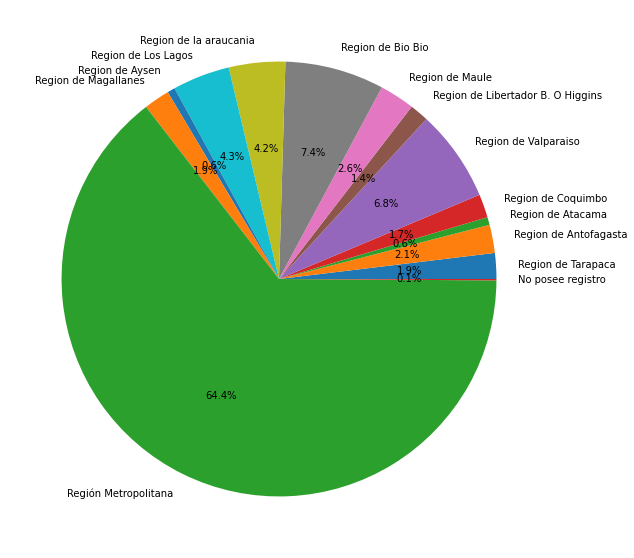

In [ ]:
Totales = [Tarapaca, Antofagasta,Atacama,Coquimbo,Valparaiso,LibBOHiggins,
           Maule,BioBio,Araucania,LosLagos,Aysen,Magallanes,Metropolitana,Nan]
tag = ['Region de Tarapaca','Region de Antofagasta','Region de Atacama',
       'Region de Coquimbo','Region de Valparaiso','Region de Libertador B. O Higgins',
       'Region de Maule','Region de Bio Bio','Region de la araucania','Region de Los Lagos',
       'Region de Aysen','Region de Magallanes','Región Metropolitana','No posee registro']
plt.figure(figsize= (10,10))
plt.pie(Totales, labels = tag, autopct= "%0.1f%%")

Este seria el grafico de torta resultante de los clientes por comuna de residencia, donde podemos apreciar que la mayor frecuencia es la Region Metropolitana con un 65.1%. También podemos apreciar la menor frecuencia de los clientes que no poseen registrada una comuna de residencia con un 0.1%.

## 5. Variable "Sexo"


A continuacion veremos graficada la distribucion de los Generos de los clientes registrados en el banco.

In [ ]:
Sexo_va = pd.get_dummies(DFinal['Sexo'])

Mujer = Sexo_va[0].sum()
Hombre = Sexo_va[1].sum()
Otro = Sexo_va[2].sum()

print(f'Mujeres: {Mujer}')
print(f'Hombres: {Hombre}')
print(f'Otro: {Otro}')

Mujeres: 27410
Hombres: 23713
Otro: 1


([<matplotlib.patches.Wedge at 0x7f4007d78690>,
 [Text(-0.1246481873014885, 1.0929148317240704, 'Mujer'),
  Text(0.1245810611635529, -1.0929224854486999, 'Hombre'),
  Text(1.099999997927342, -6.752664585696492e-05, 'Otro')],
 [Text(-0.06798992034626644, 0.5961353627585838, '53.6%'),
  Text(0.06795330608921066, -0.5961395375174725, '46.4%'),
  Text(0.5999999988694592, -3.683271592198086e-05, '0.0%')])

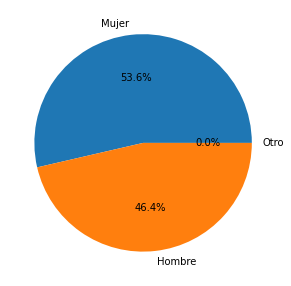

In [ ]:
Totales = [Mujer,Hombre,Otro]
tag = ['Mujer','Hombre','Otro']
plt.figure(figsize= (5,5))
plt.pie(Totales, labels = tag, autopct= "%0.1f%%")

Como podemos apreciar, existen mas Hombres que Mujeres registradas en el banco, con un porcentaje muy bajo por parte del "Otro" que no alcanza ni a ser el 1%.

## 6. Datos Outliers

Ahora veremos unos cuantos graficos para identificar datos outlaiers dentro de las variables 'Renta' y 'CUPO_L1'.

Text(0.5, 1.0, 'Outliers de Renta')

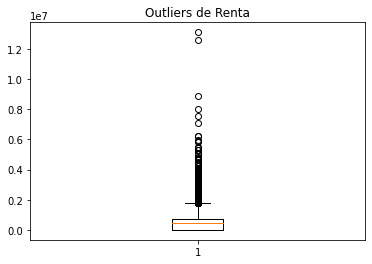

In [ ]:
datos_renta = DFinal['Renta']
fig,out = plt.subplots()
out.boxplot(datos_renta)
out.set_title('Outliers de Renta')


Se puede apreciar los datos atipicos de la tabla "Renca", esto quiere decir que hay demasiados datos de los cuales se puede modificar/eliminar para la siguiente fase no se descuadre.

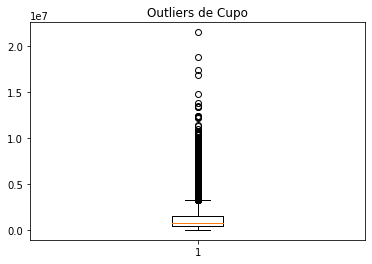

In [ ]:
datos_antiguedad = DFinal['CUPO_L1']
fig2,out2 = plt.subplots()
out2.set_title('Outliers de Cupo')
out2.boxplot(datos_antiguedad)
plt.show()

Se puede apreciar los datos atipicos de la tabla "Cupo", esto quiere decir que hay demasiados datos de los cuales se puede modificar/eliminar para la siguiente fase no se descuadre.

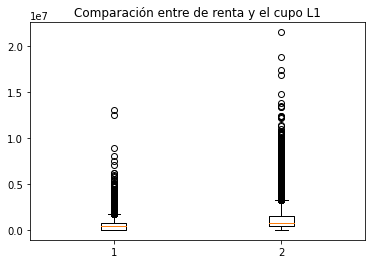

In [ ]:
datos = [datos_renta,datos_antiguedad]
fig3, out3 = plt.subplots()
out3.set_title('Comparación entre de renta y el cupo L1')
out3.boxplot(datos)
plt.show()

Aquí vemos una comparación entre datos que distintamente se relacionan entre sí, tanto como renta y CUPO_L1 tienen muchos datos atipicos de los cuales se tendrá que modificar hacía un futuro para realizar un analisis más efectivo.

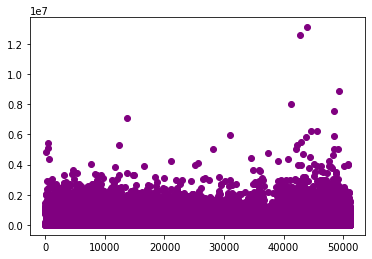

In [ ]:
plt.scatter(x=df1['Id'],y=DFinal['Renta'],c='purple')

El gráfico de dispersión muestra que los clientes y sus rentas son muy parecidas y no tan dispersas.

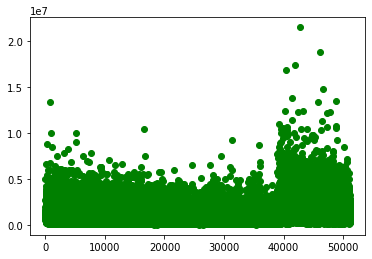

In [ ]:
plt.scatter(x=df1['Id'],y=DFinal['CUPO_L1'],c='green')

Este gráfico de dispersión sobre el CUPO_L1 muestra un poco de lo mismo que "Renta", aunque es mucho más disperso que la columna anterior.

## 7. Conclusión

<p>En esta primera instancia aprendimos a analizar las datas de bases de datos, transformar datasets a dataframes, para luego asi hacer un analisis de estos datos. Aprendimos a identificar datos nulos y datos con formatos poco convenientes par su analisis, para asi despues corregirlos y modificarlos.
Comprendimos lo que serian formulas de curtosis y simetria, datos outliers, entre otros.
Ademas lograrmos aplicar conocicimientos de semestres anteriores para generar graficos de barra, graficos de torta e histogramas.</p>

---

# Segunda Iteración

In [4]:
#Apartado de importes

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.express as px
import statistics #Import para la estadistica de la curtosis.
from scipy import stats

<p>En esta segunda parte se debió alterar la base de datos según los requerimientos pedidos, es por esto que a continuación se cargará nuevamente la base donde agregarán las columnas requeridas para poder llevar a cabo correctamente esta segunda entrega.<p/>

In [ ]:
read_file = pd.read_excel (r'C:\Users\dsola\Documents\Notebooks Jupyter\Semestral\BaseMonopolyFinal.xlsx')
read_file.to_csv (r'C:\Users\dsola\Documents\Notebooks Jupyter\Semestral\BaseFinal.csv', index = None, header=True)

In [6]:
DF = pd.read_csv('BaseFinal.csv')

In [50]:
DF.head(15)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,Col_T12,ColL1TE_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
0,1,160,1,13.0,43,0.0,130,1,1,0,...,675198.0,675198.0,22000.0,0.0,702168.0,0.0,731768.0,25890.0,0.0,0
1,2,160,0,13.0,46,143640.0,69,1,0,0,...,370529.0,82504.0,250000.0,0.0,244876.0,0.0,244876.0,284632.0,0.0,0
2,3,170,0,13.0,45,929106.0,24,1,1,0,...,123950.0,0.0,29990.0,0.0,94415.0,0.0,94415.0,0.0,0.0,0
3,4,151,0,13.0,46,172447.0,134,0,1,0,...,343226.0,315896.0,80000.0,0.0,358807.0,0.0,358807.0,14660.0,0.0,0
4,5,170,0,13.0,46,805250.0,116,0,1,1,...,177973.0,0.0,236467.0,0.0,233331.0,0.0,67516.0,234211.0,0.0,0
5,6,170,0,13.0,47,707664.0,67,1,1,0,...,130390.0,0.0,81894.0,0.0,81894.0,0.0,0.0,165188.0,0.0,0
6,7,811,0,13.0,48,1022833.0,21,1,0,1,...,567296.0,120079.0,480000.0,0.0,322145.0,0.0,393169.0,178385.0,0.0,0
7,8,170,0,13.0,46,0.0,69,0,1,1,...,0.0,0.0,19233.0,0.0,0.0,0.0,0.0,45270.0,0.0,0
8,9,170,0,13.0,49,1171066.0,33,0,0,0,...,472089.0,443880.0,60000.0,0.0,480265.0,0.0,480265.0,26191.0,0.0,1
9,10,170,1,13.0,44,964387.0,23,1,1,0,...,0.0,0.0,3647615.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [51]:
DF.shape

(51124, 62)

In [52]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Sexo'.
DF['Sexo']= label_encoder.fit_transform(DF['Sexo'])
  
DF['Sexo'].unique()

array([1, 0, 2])

0 = Hombre
,
1 = Mujer
,
2 = Otro

In [53]:
for tipo in DF.columns:
    print(f'total de valores nulos de', tipo, '=', {DF[tipo].isna().sum()} )

total de valores nulos de Id = {0}
total de valores nulos de Subsegmento = {0}
total de valores nulos de Sexo = {0}
total de valores nulos de Region = {0}
total de valores nulos de Edad = {0}
total de valores nulos de Renta = {0}
total de valores nulos de Antiguedad = {0}
total de valores nulos de Internauta = {0}
total de valores nulos de Adicional = {0}
total de valores nulos de Dualidad = {0}
total de valores nulos de Monoproducto = {0}
total de valores nulos de Ctacte = {0}
total de valores nulos de Consumo = {0}
total de valores nulos de Hipotecario = {0}
total de valores nulos de Debito = {0}
total de valores nulos de CambioPin = {0}
total de valores nulos de Cuentas = {0}
total de valores nulos de TC = {0}
total de valores nulos de CUPO_L1 = {0}
total de valores nulos de CUPO_L2 = {0}
total de valores nulos de CUPO_MX = {0}
total de valores nulos de FlgAct_T12 = {8251}
total de valores nulos de FlgActCN_T12 = {8251}
total de valores nulos de FlgActCI_T12 = {8251}
total de valore

Mediante este ciclo for podemos evidenciar los valores nulos presentes en cada columna con mayor detalle.

## 1.Tratamiento de valores nulos y tipo de datos

Debido a los cambios realizados en la base, nuevamente se desarrolló un tratamiento a los valores nulos o NaN presentes, en primer lugar a las columnas 'Renta', 'Región' y 'CambioPin'.

In [54]:
DF['Renta'] = DF['Renta'].fillna(value = 0)

In [55]:
DF['Region'] = DF['Region'].fillna(value = 0)

In [56]:
DF['CambioPin'] = DF['CambioPin'].fillna(value = 0)

En esta parte le realizamos un "transpose" a la base para poder captar la cantidad de nulos presentes por cada 'Cliente' del banco. Todo esto pensado para poder reutilizar el ciclo for utilizado anteriormente.

In [57]:
Df = pd.DataFrame.transpose(DF)

In [58]:
Df.head()

,0,1,2,3,4,5,6,7,8,9,...,51114,51115,51116,51117,51118,51119,51120,51121,51122,51123
Id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,51115.0,51116.0,51117.0,51118.0,51119.0,51120.0,51121.0,51122.0,51123.0,51124.0
Subsegmento,160.0,160.0,170.0,151.0,170.0,170.0,811.0,170.0,170.0,170.0,...,170.0,170.0,170.0,160.0,160.0,160.0,170.0,160.0,160.0,170.0
Sexo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
Region,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,13.0,3.0,2.0,7.0,13.0,13.0,13.0,13.0,13.0,13.0
Edad,43.0,46.0,45.0,46.0,46.0,47.0,48.0,46.0,49.0,44.0,...,47.0,50.0,49.0,50.0,44.0,51.0,51.0,47.0,47.0,51.0


Aquí podemos apreciar la base con las columnas y filas invertidas. Con esto así ya se puede hacer uso de este codigo de una forma conveniente, la cual también nos brindará mucha información. 

In [59]:
for tipo in Df.columns:
    print(f'total de valores nulos de', tipo, '=', {Df[tipo].isna().sum()} )

Se truncaron las últimas líneas 5000 del resultado de transmisión.
total de valores nulos de 46124 = {0}
total de valores nulos de 46125 = {0}
total de valores nulos de 46126 = {0}
total de valores nulos de 46127 = {0}
total de valores nulos de 46128 = {0}
total de valores nulos de 46129 = {40}
total de valores nulos de 46130 = {0}
total de valores nulos de 46131 = {0}
total de valores nulos de 46132 = {0}
total de valores nulos de 46133 = {0}
total de valores nulos de 46134 = {0}
total de valores nulos de 46135 = {0}
total de valores nulos de 46136 = {0}
total de valores nulos de 46137 = {0}
total de valores nulos de 46138 = {40}
total de valores nulos de 46139 = {0}
total de valores nulos de 46140 = {0}
total de valores nulos de 46141 = {0}
total de valores nulos de 46142 = {0}
total de valores nulos de 46143 = {0}
total de valores nulos de 46144 = {0}
total de valores nulos de 46145 = {0}
total de valores nulos de 46146 = {0}
total de valores nulos de 46147 = {0}
total de valores nu

Como se puede apreciar, hay algunos clientes, los cuales estan identificados por su 'ID' que arrojan una gran cantidad de datos nulos, algunos de los que podemos mencionar de la lista son: el Cliente con ID: 12, 15, 34, 39, 43, 46, entre otros. 

In [60]:
Df.shape

(62, 51124)

Es por esto que como grupo coincidimos en que debemos eliminar estos datos de la base, ya que la cantidad de nulos que poseen estos es excesiva y consideramos que esto nos puede afectar en fiabilidad a la hora de generar los modelos de predicción.

In [61]:
FinalDataFrame = Df.dropna(thresh=40, axis=1)

In [62]:
FinalDataFrame = pd.DataFrame.transpose(FinalDataFrame)

In [63]:
FinalDataFrame = FinalDataFrame.astype('int64')

In [64]:
FinalDataFrame.shape

(42873, 62)

### En total se eliminaron 8251 filas/clientes, quedando con una base limpia y lista para trabajar

In [65]:
FinalDataFrame.head(15)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,Col_T12,ColL1TE_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
0,1,160,1,13,43,0,130,1,1,0,...,675198,675198,22000,0,702168,0,731768,25890,0,0
1,2,160,0,13,46,143640,69,1,0,0,...,370529,82504,250000,0,244876,0,244876,284632,0,0
2,3,170,0,13,45,929106,24,1,1,0,...,123950,0,29990,0,94415,0,94415,0,0,0
3,4,151,0,13,46,172447,134,0,1,0,...,343226,315896,80000,0,358807,0,358807,14660,0,0
4,5,170,0,13,46,805250,116,0,1,1,...,177973,0,236467,0,233331,0,67516,234211,0,0
5,6,170,0,13,47,707664,67,1,1,0,...,130390,0,81894,0,81894,0,0,165188,0,0
6,7,811,0,13,48,1022833,21,1,0,1,...,567296,120079,480000,0,322145,0,393169,178385,0,0
7,8,170,0,13,46,0,69,0,1,1,...,0,0,19233,0,0,0,0,45270,0,0
8,9,170,0,13,49,1171066,33,0,0,0,...,472089,443880,60000,0,480265,0,480265,26191,0,1
9,10,170,1,13,44,964387,23,1,1,0,...,0,0,3647615,0,0,0,0,0,0,0


## 2.Calculo de Correlaciones 

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,Col_T12,ColL1TE_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
Id,1.000000,0.020741,0.014515,-0.010508,0.383782,-0.080828,0.162512,-0.175343,0.060277,-0.082083,...,-0.002896,0.016585,0.012990,-0.005781,0.020413,-0.002576,0.025340,-0.017038,0.002902,0.016306
Subsegmento,0.020741,1.000000,0.023510,-0.037373,-0.524276,-0.162775,-0.291807,0.225061,-0.165067,-0.110993,...,-0.103262,-0.120191,-0.068891,-0.001777,-0.142091,0.000099,-0.145672,-0.038117,-0.001155,-0.027946
Sexo,0.014515,0.023510,1.000000,0.026780,-0.038471,-0.111531,-0.041551,-0.001004,-0.094460,-0.008272,...,-0.014264,-0.010361,-0.016531,-0.004591,-0.012288,-0.001806,-0.014886,-0.001071,-0.002362,-0.019161
Region,-0.010508,-0.037373,0.026780,1.000000,0.003649,0.022863,0.043588,0.052477,0.081435,-0.004818,...,0.032987,0.008695,0.026524,0.003351,0.021375,0.012418,0.016671,0.027791,0.010464,-0.012039
Edad,0.383782,-0.524276,-0.038471,0.003649,1.000000,0.117086,0.518372,-0.412873,0.237953,0.004760,...,0.110230,0.154486,0.104554,0.000136,0.190488,0.007606,0.197700,0.019151,0.008429,0.052471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EeccInt_T12,-0.002576,0.000099,-0.001806,0.012418,0.007606,0.045470,0.027120,-0.001861,0.000292,0.014555,...,0.068790,0.011150,0.054019,0.006492,0.015219,1.000000,0.018428,-0.000731,0.799409,0.006523
UsoL1_T12,0.025340,-0.145672,-0.014886,0.016671,0.197700,0.097618,0.250658,-0.092267,0.127263,0.021864,...,0.549884,0.939414,0.046471,-0.002754,0.959930,0.018428,1.000000,0.060028,0.012243,0.059348
UsoL2_T12,-0.017038,-0.038117,-0.001071,0.027791,0.019151,0.062651,0.019516,0.013283,0.026070,0.028914,...,0.849221,0.017833,0.146473,-0.001666,0.085866,-0.000731,0.060028,1.000000,-0.002063,0.032629
UsoLI_T12,0.002902,-0.001155,-0.002362,0.010464,0.008429,0.048838,0.020540,-0.003828,-0.001654,0.018006,...,0.080070,0.004869,0.034489,0.002819,0.013268,0.799409,0.012243,-0.002063,1.000000,0.005903


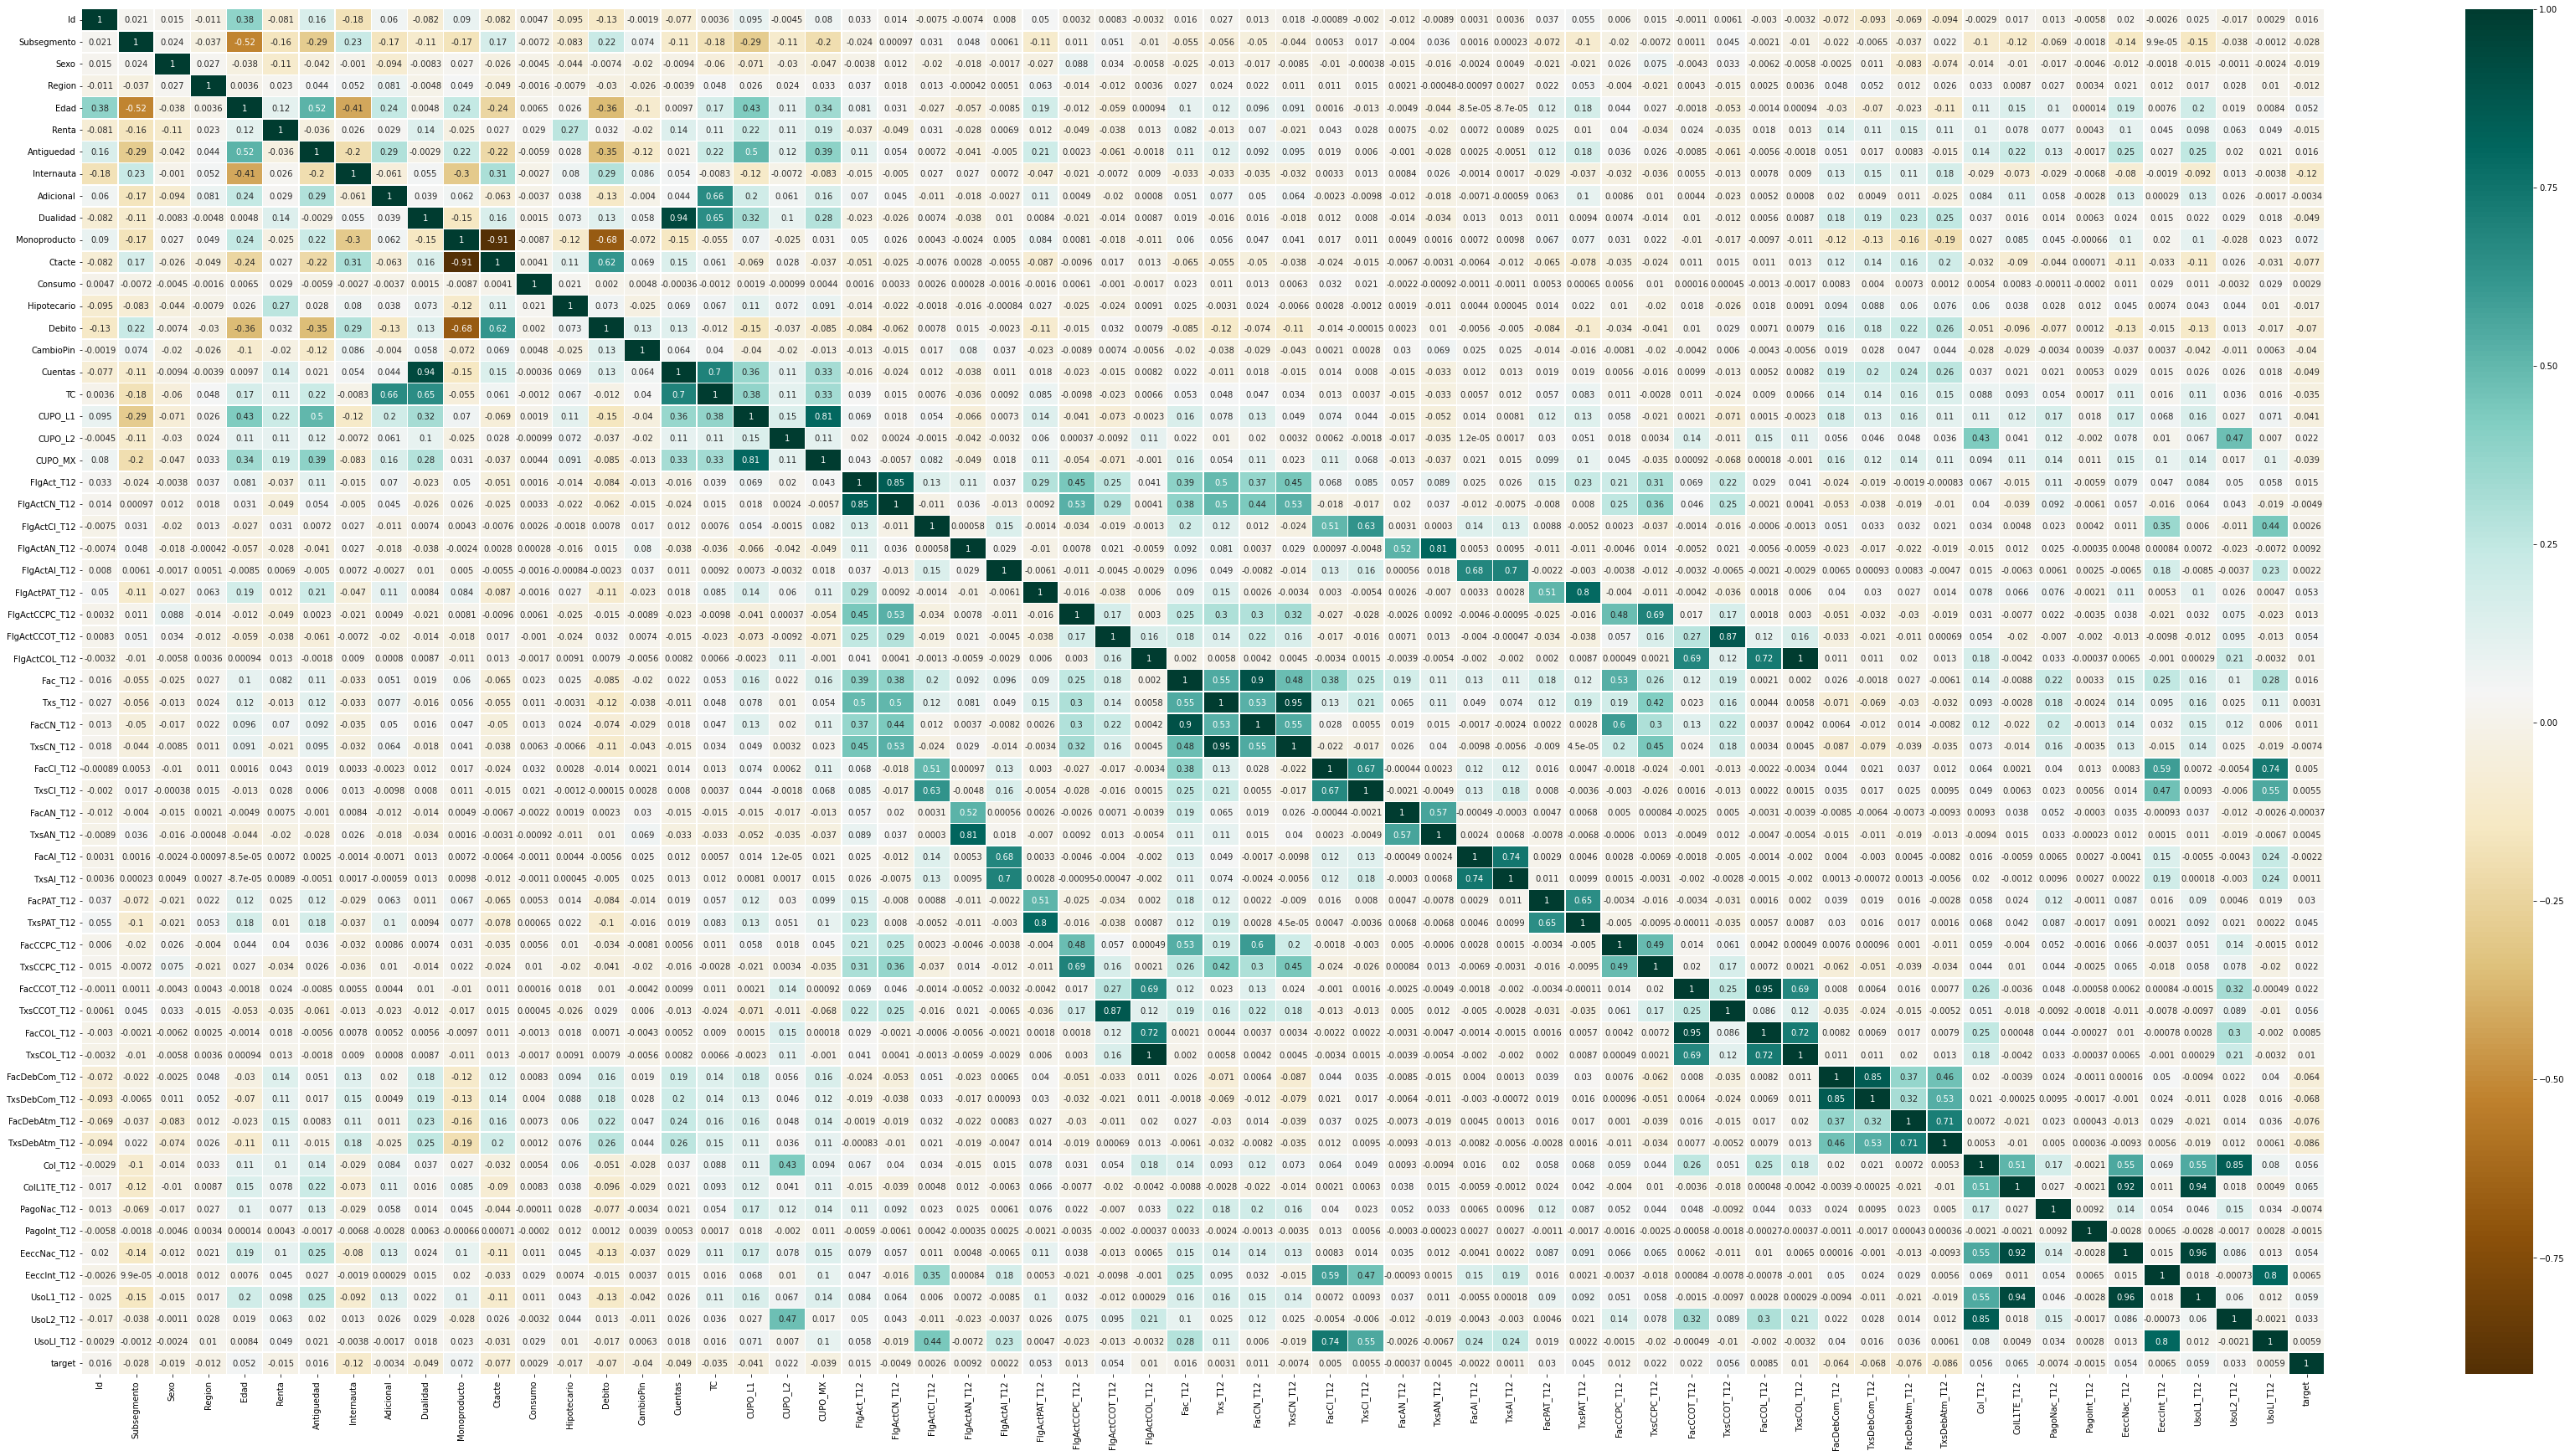

In [66]:
#Relaciones entre las columnas del DataFrame
plt.figure(figsize=(60, 30))
corr_muestra = FinalDataFrame.corr()
sns.heatmap(corr_muestra, cmap="BrBG", annot=True, linewidths=.5)
corr_muestra

                   Id  Subsegmento      Sexo    Region      Edad     Renta  \
Id           1.000000     0.020741  0.014515 -0.010508  0.383782 -0.080828   
Subsegmento  0.020741     1.000000  0.023510 -0.037373 -0.524276 -0.162775   
Sexo         0.014515     0.023510  1.000000  0.026780 -0.038471 -0.111531   
Region      -0.010508    -0.037373  0.026780  1.000000  0.003649  0.022863   
Edad         0.383782    -0.524276 -0.038471  0.003649  1.000000  0.117086   
...               ...          ...       ...       ...       ...       ...   
EeccNac_T12  0.020413    -0.142091 -0.012288  0.021375  0.190488  0.103877   
EeccInt_T12 -0.002576     0.000099 -0.001806  0.012418  0.007606  0.045470   
UsoL1_T12    0.025340    -0.145672 -0.014886  0.016671  0.197700  0.097618   
UsoL2_T12   -0.017038    -0.038117 -0.001071  0.027791  0.019151  0.062651   
UsoLI_T12    0.002902    -0.001155 -0.002362  0.010464  0.008429  0.048838   

             Antiguedad  Internauta  Adicional  Dualidad  ...  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


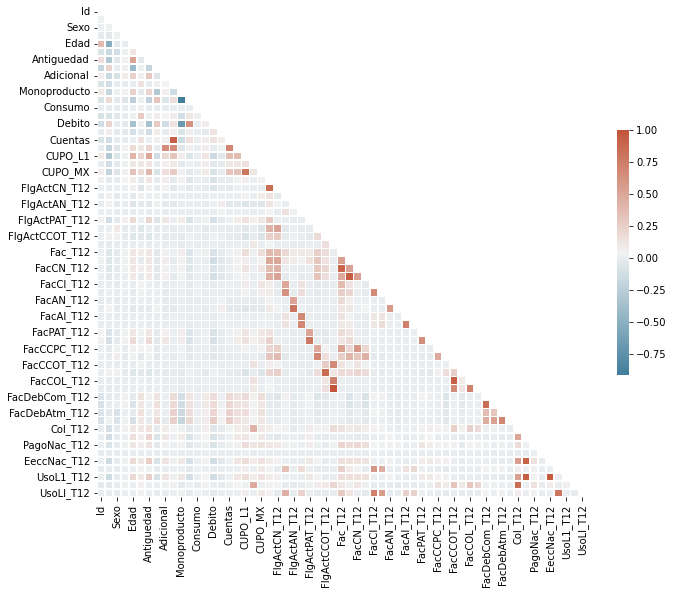

In [67]:
corr = FinalDataFrame.set_index('target').corr()
print(corr)

# Para excluir las correlaciones duplicadas
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Tamaño de la Figura
f, ax = plt.subplots(figsize=(11, 9))

# Generar paleta de color
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Mapa de calor con el Mask correcto
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [68]:
FinalDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42873 entries, 0 to 51123
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Id              42873 non-null  int64
 1   Subsegmento     42873 non-null  int64
 2   Sexo            42873 non-null  int64
 3   Region          42873 non-null  int64
 4   Edad            42873 non-null  int64
 5   Renta           42873 non-null  int64
 6   Antiguedad      42873 non-null  int64
 7   Internauta      42873 non-null  int64
 8   Adicional       42873 non-null  int64
 9   Dualidad        42873 non-null  int64
 10  Monoproducto    42873 non-null  int64
 11  Ctacte          42873 non-null  int64
 12  Consumo         42873 non-null  int64
 13  Hipotecario     42873 non-null  int64
 14  Debito          42873 non-null  int64
 15  CambioPin       42873 non-null  int64
 16  Cuentas         42873 non-null  int64
 17  TC              42873 non-null  int64
 18  CUPO_L1         42873 non-

In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
X= np.array(FinalDataFrame.drop(['target'],1)) # Array con las etiquetas
y =np.array(FinalDataFrame['target']) # Variable a predecir

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


<p>Importamos las librerias necesarias para generar nuestro modelo de Arbol de Decision de Clasificacion e instanciamos la variable "target" para generar los distintos modelos a continuacion</p>

## 3.1 Arbol de Decision 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5) # 50% Training y 50% test
print('Son {} datos para entrenamiento y {} datos de prueba'.format(X_train.shape[0],X_test.shape[0]))
modeloDT= DecisionTreeClassifier(max_depth = 5)
modeloDT.fit(X_train, y_train)
Y_pred=modeloDT.predict(X_test)
print('Precisión del modelo: {:0.3f}%'.format(metrics.accuracy_score(y_test, Y_pred)))

Son 21436 datos para entrenamiento y 21437 datos de prueba
Precisión del modelo: 0.902%


Profundidad del árbol: 5
Número de nodos terminales: 31


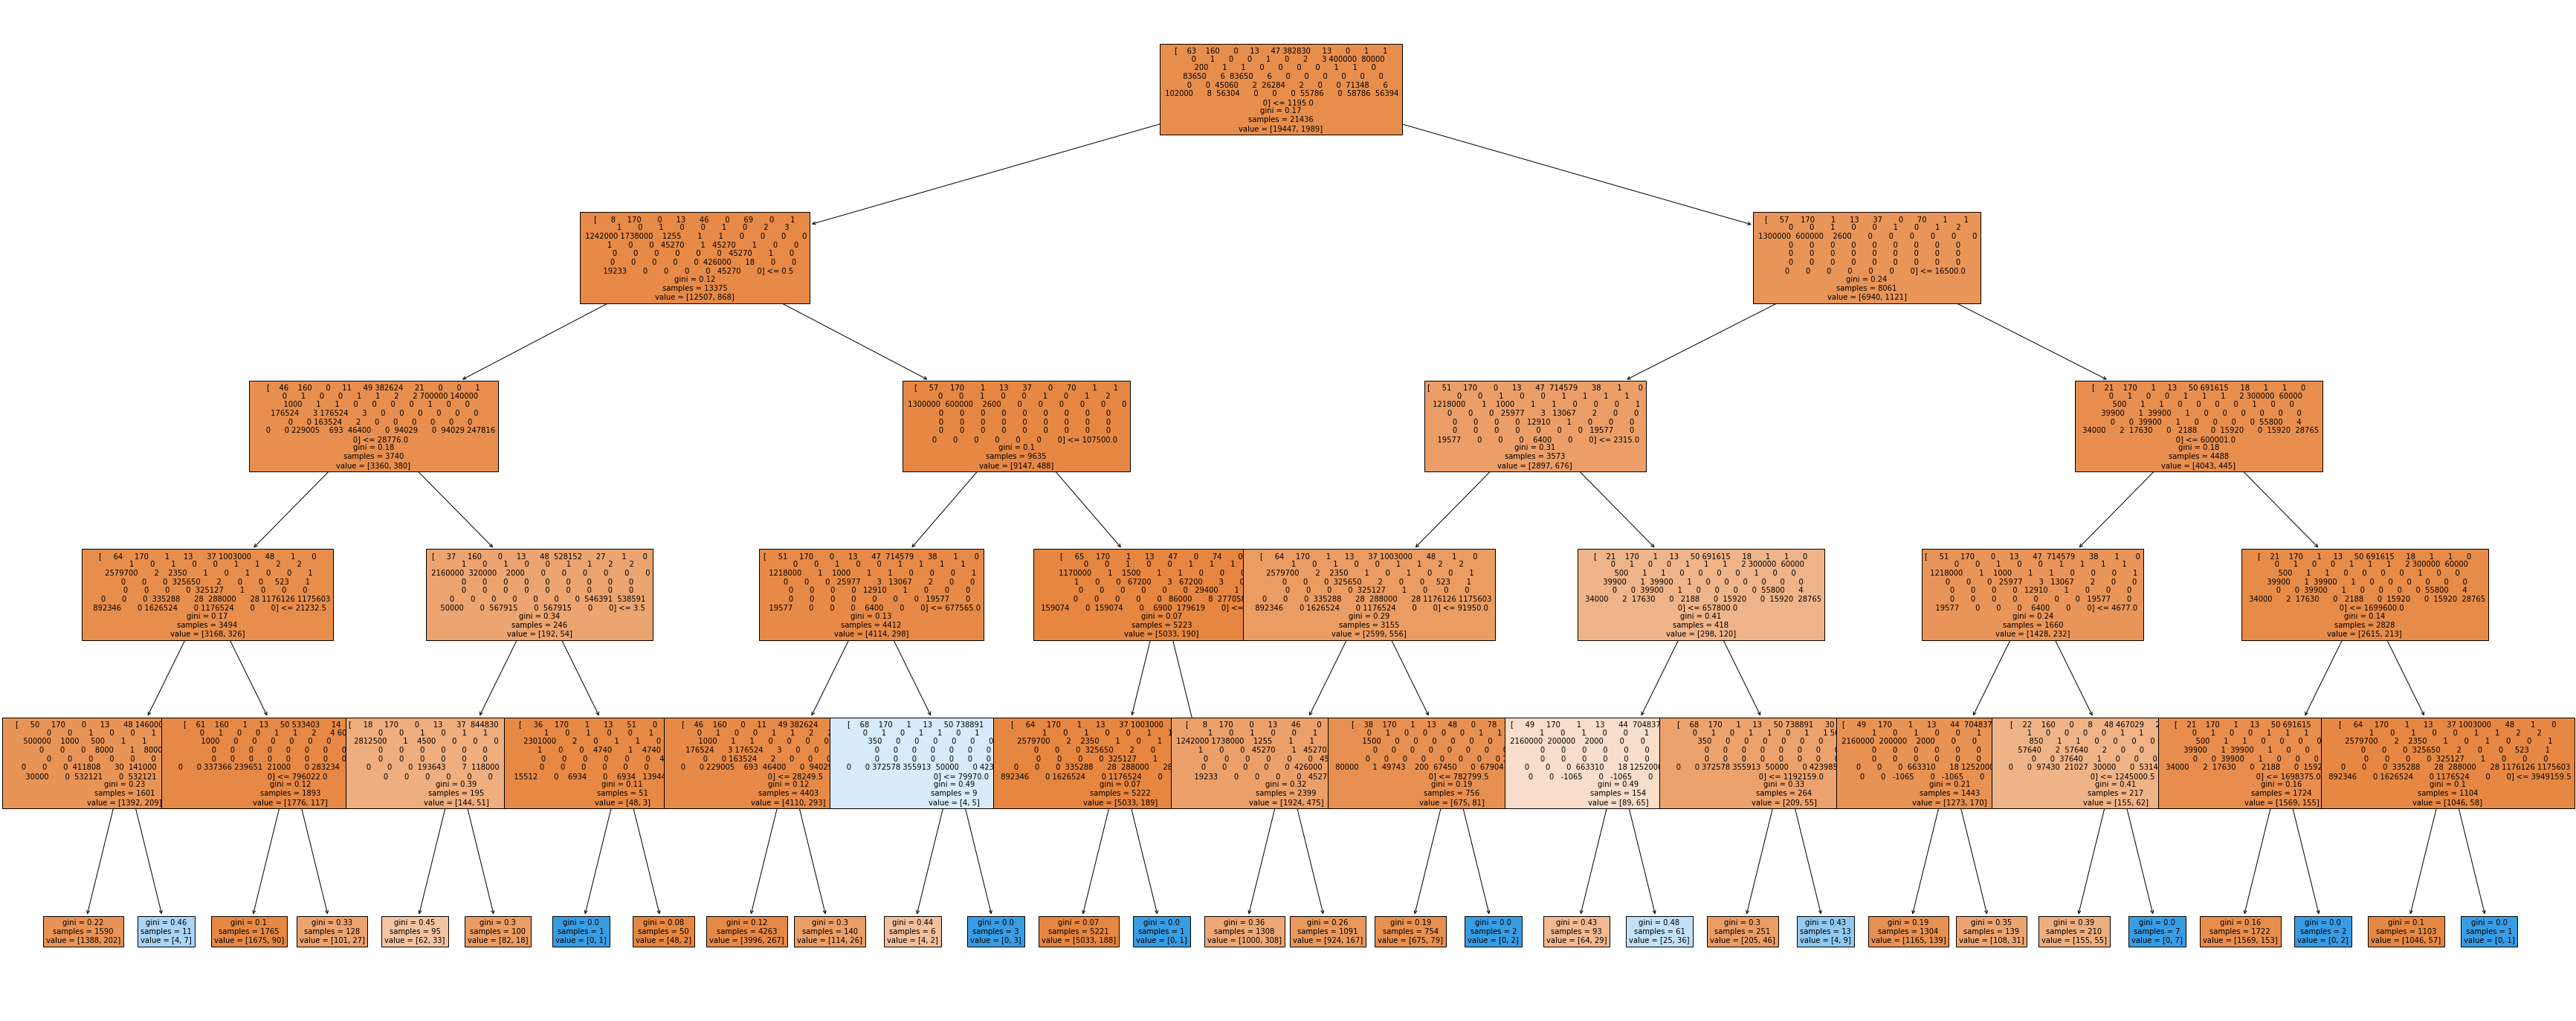

In [71]:
plt.subplots(figsize=(60,25))

print(f"Profundidad del árbol: {modeloDT.get_depth()}")
print(f"Número de nodos terminales: {modeloDT.get_n_leaves()}")

plot_tree(decision_tree=modeloDT, feature_names=X, filled=True, fontsize = 10, precision = 2);

In [72]:
importancia_predictores = pd.DataFrame(
                            {'predictor': FinalDataFrame.drop(columns = "target").columns,
                             'importancia': modeloDT.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=True)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,Id,0.000000
26,FlgActPAT_T12,0.000000
27,FlgActCCPC_T12,0.000000
28,FlgActCCOT_T12,0.000000
29,FlgActCOL_T12,0.000000
...,...,...
7,Internauta,0.090739
18,CUPO_L1,0.093626
44,FacCCOT_T12,0.098688
50,FacDebAtm_T12,0.151731


La variable "ColL1TE_T12" resulta como la mas importante de los predictores con una puntuacion del 0.262991.

## 3.2 Random Forest

In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler

from mlxtend.plotting import plot_confusion_matrix

#import graphviz 

In [74]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = FinalDataFrame.drop(["target"],axis = 1)

# y es nuestra variable dependiente
y = FinalDataFrame.target

# División 50% de datos para entrenamiento, 50% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [75]:
# Se crea el modelo y los numeros de estimadores
forest_model = RandomForestClassifier(n_estimators = 10, 
                                  random_state = 2016,
                                  min_samples_leaf = 10,)

In [76]:
# Arrbol de desicion y hojas maximas
forest_model = tree.DecisionTreeClassifier(max_leaf_nodes = 10)

In [77]:
forest_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [78]:
# Accuracy promedio
print('Precisión del modelo: {:0.3f}%'.format(forest_model.score(X_test, y_test)))

Precisión del modelo: 0.903%


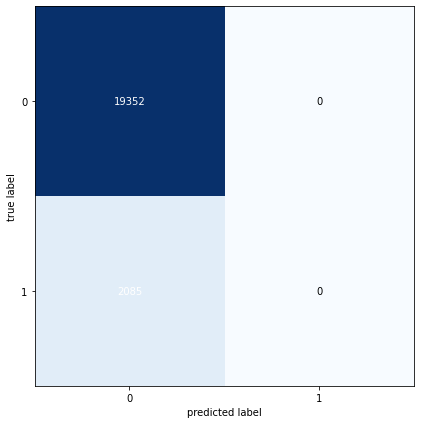

In [79]:
# Predicción del modelo usando los datos de prueba
y_pred = forest_model.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [80]:
importancia_predictores = pd.DataFrame(
                            {'predictor': FinalDataFrame.drop(columns = "target").columns,
                             'importancia': forest_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=True)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,Id,0.000000
59,UsoL2_T12,0.000000
31,Txs_T12,0.000000
32,FacCN_T12,0.000000
33,TxsCN_T12,0.000000
...,...,...
7,Internauta,0.074938
44,FacCCOT_T12,0.142878
18,CUPO_L1,0.145910
51,TxsDebAtm_T12,0.203554


La variable "ColL1TE_T12" resulta como la mas importante de los predictores con una puntacion del 0.356661.

## 3.3 K Neighbors

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


modeloNC= KNeighborsClassifier(n_neighbors=5)
modeloNC.fit(X_train, y_train)
Y_pred=modeloNC.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Precisión del modelo: {:0.3f}%'.format(modeloNC.score(X_train,y_train)))

Precisión del modelo: 0.911%


## 4.Conclusion

Al rededor de esta segunda entrega logramos realizar en total 3 modelos predictivos a partir de la variable "target", dentro de esos 3 el modelo mas fiable (con poca diferencia) entregado es el de K Neighbours, con una puntuación del 0.911%.